# Note formation corpus DEFUWAXU
## - Author Thierno I. Diop

In [1]:
import newspaper
from newspaper import Article
%load_ext autoreload
%autoreload 23
%matplotlib inline

# Article Test

In [2]:
a=Article("https://www.defuwaxu.com/2020/03/24/sey-xare-la/")
a.download()

In [3]:
a.parse()
a.nlp()

In [4]:
a.summary

'SAFIYETU BÉEY Céy Koronaa !\nDoomu-jàngoro bii yëngal na jamono.\nKu mënoon a gëm lu ndawe nii dina noot àddina sépp ?\nTax na ba kenn ñemeetul a...'

In [5]:
a.meta_data["article"]["section"]

'NATAALI AYUBÉS BI'

In [6]:
a.source_url

'https://www.defuwaxu.com'

# Source Test

In [7]:
def get_news(news_websites):
    article_treated = 0
    articles = []
    for i,news in enumerate(news_websites):
        print(i,"-",news)
        s= newspaper.build(news, memoize_articles=False)
        for article in s.articles:
            count = 0
            try:
                article.download()
                article.parse()
                article.nlp()
                while article.download_state  != 2 and count < 3:
                    # ArticleDownloadState.SUCCESS is 2 
                    print("#####RETRY")
                    count = count+1
                    time.sleep(count)
                if(count < 3):
                    article_treated+=1
                if(article_treated % 10 == 0):
                    print("Number of documents treated : ",article_treated)
                articles.append({"domaine":news, "text": article.text, "section":article.meta_data["article"]["section"], "url" : article.url})
            except:
                pass
    return articles

In [8]:
news_websites  = ["https://www.defuwaxu.com"]
articles = get_news(news_websites)

0 - https://www.defuwaxu.com
Number of documents treated :  10
Number of documents treated :  20
Number of documents treated :  30
Number of documents treated :  40
Number of documents treated :  50
Number of documents treated :  60
Number of documents treated :  70


In [9]:
import pandas as pd

In [10]:
datafram_articles = pd.DataFrame(articles)

In [11]:
datafram_articles.to_csv("articles_defuwaxo.csv",index=False)

In [12]:
datafram_articles.head()

,domaine,text,section,url
0,https://www.defuwaxu.com,"PAAP AALI JÀLLO\n\nGeorge Floyd, jamono jii, m...",Xibaar,https://www.defuwaxu.com/2020/06/10/fukki-simi...
1,https://www.defuwaxu.com,SAFIYETU BÉEY Céy Koronaa ! Doomu-jàngoro bii ...,Xibaar,https://www.defuwaxu.com/2020/06/10/yow-koronaa/
2,https://www.defuwaxu.com,"USÉYNU BÉEY\n\nKoronaawiris bi, li muy metti m...",Xibaar,https://www.defuwaxu.com/2020/05/17/afrig-ak-k...
3,https://www.defuwaxu.com,"ABDULAAY SEKK\n\nMbas mi jaaxal na ñépp, yënga...",Xibaar,https://www.defuwaxu.com/2020/05/17/bes-bu-mba...
4,https://www.defuwaxu.com,SAFIYETU BÉEY\n\nCéy Koronaa ! Doomu-jàngoro b...,Xibaar,https://www.defuwaxu.com/2020/05/17/jang-ak-ja...


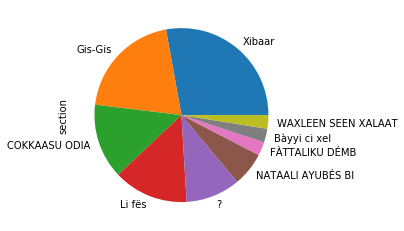

In [13]:
datafram_articles.section.value_counts().plot(kind="pie")

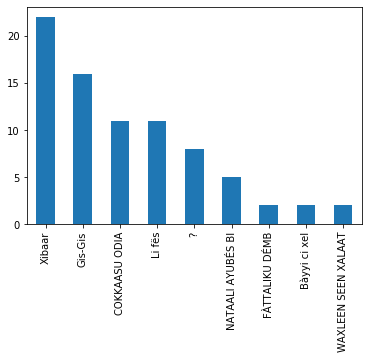

In [14]:
datafram_articles.section.value_counts().plot(kind="bar")

In [15]:
datafram_articles["text_splitted"] = datafram_articles.text.apply(lambda text : text.split("\n"))

In [16]:
datafram_articles.drop(columns=["text"], inplace=True)

In [17]:
datafram_articles.head()

,domaine,section,url,text_splitted
0,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/06/10/fukki-simi...,"[PAAP AALI JÀLLO, , George Floyd, jamono jii, ..."
1,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/06/10/yow-koronaa/,[SAFIYETU BÉEY Céy Koronaa ! Doomu-jàngoro bii...
2,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/05/17/afrig-ak-k...,"[USÉYNU BÉEY, , Koronaawiris bi, li muy metti ..."
3,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/05/17/bes-bu-mba...,"[ABDULAAY SEKK, , Mbas mi jaaxal na ñépp, yëng..."
4,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/05/17/jang-ak-ja...,"[SAFIYETU BÉEY, , Céy Koronaa ! Doomu-jàngoro ..."


In [18]:
datafram_sentences =  datafram_articles.text_splitted.apply(pd.Series) \
    .merge(datafram_articles, right_index = True, left_index = True) \
    .drop(["text_splitted"], axis = 1) \
    .melt(id_vars = ['domaine', 'section',"url"], value_name = "sentence") \
    .drop("variable", axis = 1) \
    .dropna()

In [19]:
datafram_sentences.tail()

,domaine,section,url,sentence
11714,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-son...,"Moo saxal ni, ciy gëstoom, Afrig benn aada a k..."
11792,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-son...,
11793,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-son...,
11871,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-son...,(ÑAAREELU XAAJ BI FEEK I FAN)
11872,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-son...,(ÑAAREELU XAAJ BI FEEK I FAN)


In [20]:
datafram_sentences.shape

(2203, 4)

In [21]:
datafram_sentences = datafram_sentences[(datafram_sentences.sentence != "") & (datafram_sentences.sentence.str.isspace() == False)]

In [22]:
datafram_sentences.shape

(1141, 4)

In [23]:
datafram_sentences["caracter_count"] = datafram_sentences.sentence.str.len()

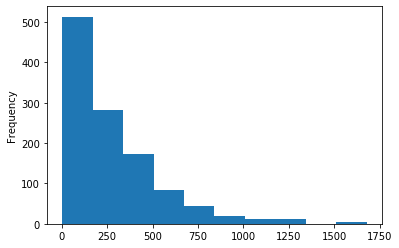

In [24]:
datafram_sentences.caracter_count.plot(kind="hist")

In [25]:
datafram_sentences["length_class"] = pd.cut(datafram_sentences.caracter_count, list(range(0,datafram_sentences["caracter_count"].max(), 50)))\
    .astype(str)\
    .apply(lambda lenght_class : "->".join(lenght_class.replace("(","").replace("]","").replace(".0","").split(", ")))

In [26]:
pd.options.display.max_colwidth = int(datafram_sentences.caracter_count.max())

In [27]:
datafram_sentences.tail()

,domaine,section,url,sentence,caracter_count,length_class
11556,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-sonko-maki-sall-cuune-la-di-def-yefi-cuune/#respond,"Tey, Sinwaa bi dafa gëm ni Siin moo war jiite àddina si te ndog-ndog da ko daloon ci diggante bi, Àngalteer ak Sapoŋ raw ko. Moo tax, Siin dafa gëm cosaanam ak démbam. Iraŋ, bu àddina sépp waxee mu téye fi mu téye rekk, ñemee ŋoy fi mu ŋoy, booba cëslaayu aadaam a ko ko may. Ñoom, ca nguurug Pers ga woon lañuy sukkandiku fonk seen bopp. Turki, ñoomit, ca nguurug Otomaan ga woon lañuy wéru. Boo demee Ërob, tamit noonu. Kon, koo jël ci àddina si, ci démbam la sukkandiku ngir jéem a suuxat réewam. Loolu la Séex Anta Jóob xamoon bu yàgg. Moo tax liggéeyam am solo lool.",571,550->600
11713,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-sonko-maki-sall-cuune-la-di-def-yefi-cuune/,"Moo saxal ni, ciy gëstoom, Afrig benn aada a ko lal, te Misra moo fi ëppoon doole. Tubaab baa ñëw ci ginnaaw, gëmloo nu leneen, suufeelnu banu xeeb sunu bopp. Xeebeel boobu la Séex AntaJóob dindi.",196,150->200
11714,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-sonko-maki-sall-cuune-la-di-def-yefi-cuune/#respond,"Moo saxal ni, ciy gëstoom, Afrig benn aada a ko lal, te Misra moo fi ëppoon doole. Tubaab baa ñëw ci ginnaaw, gëmloo nu leneen, suufeelnu banu xeeb sunu bopp. Xeebeel boobu la Séex AntaJóob dindi.",196,150->200
11871,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-sonko-maki-sall-cuune-la-di-def-yefi-cuune/,(ÑAAREELU XAAJ BI FEEK I FAN),29,0->50
11872,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/06/10/usmaan-sonko-maki-sall-cuune-la-di-def-yefi-cuune/#respond,(ÑAAREELU XAAJ BI FEEK I FAN),29,0->50


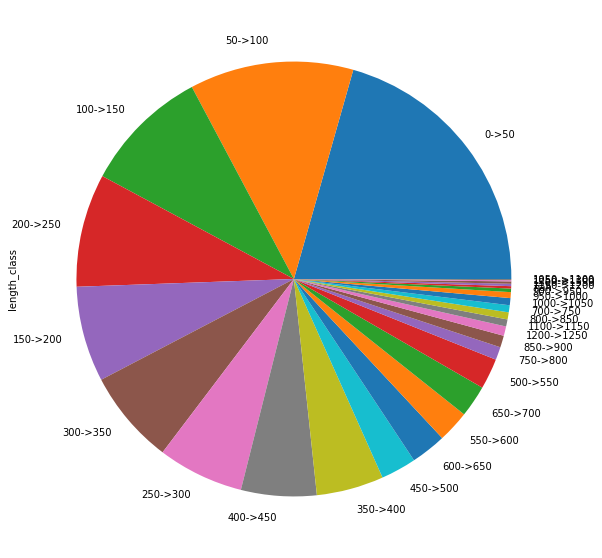

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
datafram_sentences.length_class.value_counts().plot(kind="pie")

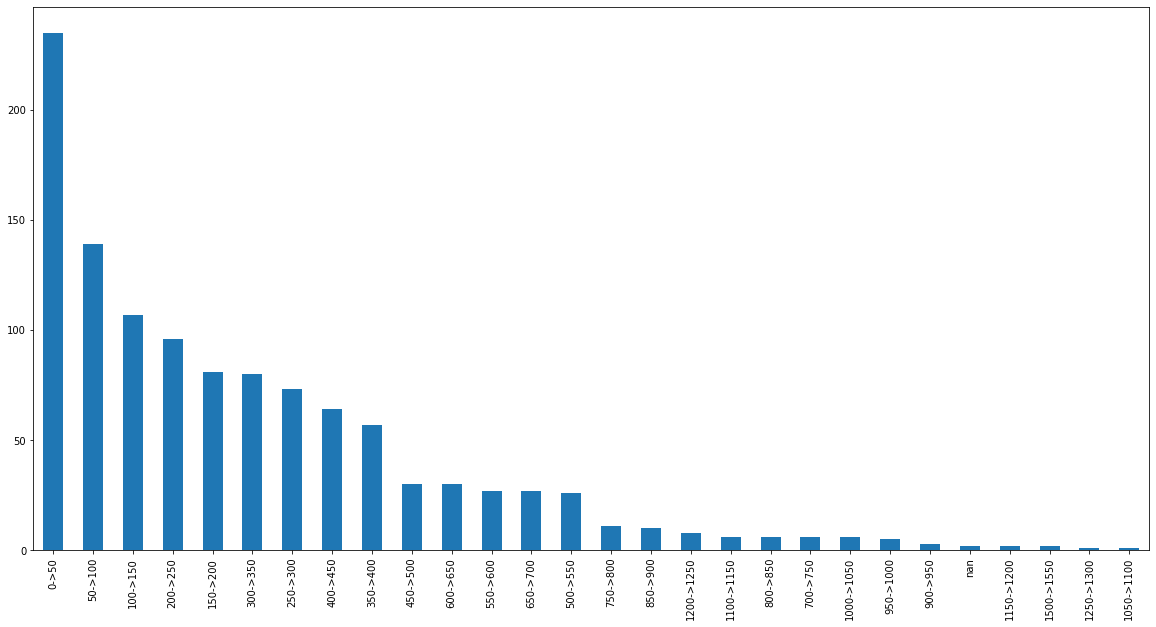

In [29]:
plt.figure(figsize=(20,10))
datafram_sentences.length_class.value_counts().plot(kind="bar")

In [30]:
datafram_sentences[datafram_sentences.length_class == "0->50"].sort_values("caracter_count",ascending=False)

,domaine,section,url,sentence,caracter_count,length_class
2442,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/04/06/koronaa-jat-na-paap-juuf-gaynde-gaynde-yi/#respond,"xol, moom mi nga xam ne, bokk na ci ñi defar këlëb",50,0->50
2441,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/04/06/koronaa-jat-na-paap-juuf-gaynde-gaynde-yi/,"xol, moom mi nga xam ne, bokk na ci ñi defar këlëb",50,0->50
162,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/05/17/jang-ak-jangale-ci-jamonoy-mbas/,Céy Koronaa ! Doomu-jàngoro bii yëngal na jamono.,49,0->50
2248,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/04/28/bu-dul-woon-doxandeem-yi-mbas-mi-du-naane-neex-afrig-doktoor-seydu-jallo-2/#respond,Màndarga yii daal ñoo gën a fés ñeel Covid-19 bi.,49,0->50
2247,https://www.defuwaxu.com,Xibaar,https://www.defuwaxu.com/2020/04/28/bu-dul-woon-doxandeem-yi-mbas-mi-du-naane-neex-afrig-doktoor-seydu-jallo-2/,Màndarga yii daal ñoo gën a fés ñeel Covid-19 bi.,49,0->50
...,...,...,...,...,...,...
224,https://www.defuwaxu.com,FÀTTALIKU DÉMB,https://www.defuwaxu.com/2019/05/30/saartjie-baartman-ndaw-sa-tubaab-yi-defoon-mala/,Waaw.,5,0->50
228,https://www.defuwaxu.com,FÀTTALIKU DÉMB,https://www.defuwaxu.com/2019/05/30/saartjie-baartman-ndaw-sa-tubaab-yi-defoon-mala/#respond,Waaw.,5,0->50
681,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2019/11/21/mag-sama-gor-du-ragal-du-wor/#comments,"Kôro,",5,0->50
2599,https://www.defuwaxu.com,Li fës,https://www.defuwaxu.com/2020/04/06/koronaa-jat-na-paap-juuf-gaynde-gaynde-yi/,bi.,3,0->50


In [31]:
datafram_sentences.to_csv("sentences.csv",index=False)